- Le dataset load_breast_cancer() provient de la bibliothèque sklearn et est souvent utilisé pour des tâches de classification binaire. Il contient des informations sur des tumeurs mammaires, avec pour objectif de prédire si une tumeur est bénigne ou maligne, en fonction de plusieurs caractéristiques.

# Voici une description plus détaillée des données :

Objectif : Le but est de classer les tumeurs mammaires en deux catégories :

0 : Bénin
1 : Malin
Caractéristiques : Le dataset contient 30 attributs numériques pour chaque échantillon, qui sont des mesures de diverses propriétés des cellules dans les tumeurs, telles que :

La moyenne, l'écart-type et la variance de 10 propriétés géométriques et texturales des cellules, comme la superficie, la compacité, la concavité, etc.
Les 30 caractéristiques sont :

- mean radius : Moyenne du rayon des cellules tumorales.
- mean texture : Moyenne de la texture des cellules, calculée à partir de l'intensité des pixels dans les images.
- mean perimeter : Moyenne du périmètre des cellules.
- mean area : Moyenne de l'aire des cellules.
- mean smoothness : Moyenne de la douceur de la frontière des cellules.
- mean compactness : Moyenne de la compacité des cellules, mesurée comme le rapport entre la surface et le carré du périmètre.
- mean concavity : Moyenne de la concavité, représentant l'indentation des contours des cellules.
- mean concave points : Moyenne du nombre de points concaves présents dans le contour des cellules.
- mean symmetry : Moyenne de la symétrie des cellules, indiquant la régularité de leur forme.
- mean fractal dimension : Moyenne de la dimension fractale des cellules, utilisée pour mesurer la complexité de la forme des cellules.
- radius error : Erreur de mesure sur le rayon des cellules.
- texture error : Erreur de mesure sur la texture des cellules.
- perimeter error : Erreur de mesure sur le périmètre des cellules.
- area error : Erreur de mesure sur l'aire des cellules.
- smoothness error : Erreur de mesure sur la douceur des cellules.
- compactness error : Erreur de mesure sur la compacité des cellules.
- concavity error : Erreur de mesure sur la concavité des cellules.
- concave points error : Erreur de mesure sur le nombre de points concaves des cellules.
- symmetry error : Erreur de mesure sur la symétrie des cellules.
- fractal dimension error : Erreur de mesure sur la dimension fractale des cellules.
- worst radius : Valeur la plus grande du rayon parmi les différentes zones d'une cellule.
- worst texture : Valeur la plus grande de la texture parmi les différentes zones d'une cellule.
- worst perimeter : Valeur la plus grande du périmètre parmi les différentes zones d'une cellule.
- worst area : Valeur la plus grande de l'aire parmi les différentes zones d'une cellule.
- worst smoothness : Valeur la plus grande de la douceur parmi les différentes zones d'une cellule.
- worst compactness : Valeur la plus grande de la compacité parmi les différentes zones d'une cellule.
- worst concavity : Valeur la plus grande de la concavité parmi les différentes zones d'une cellule.
- worst concave points : Valeur la plus grande du nombre de points concaves parmi les différentes zones d'une cellule.
- worst symmetry : Valeur la plus grande de la symétrie parmi les différentes zones d'une cellule.
- worst fractal dimension : Valeur la plus grande de la dimension fractale parmi les différentes zones d'une cellule.
    
## Nombre d'échantillons : Il y a 569 échantillons dans ce dataset, avec 357 échantillons de tumeurs bénignes et 212 de tumeurs malignes.

## Format : Les données sont organisées en un tableau de caractéristiques et un tableau de labels :

- X : un tableau de forme (569, 30), où chaque ligne représente un échantillon et chaque colonne une caractéristique.
- y : un tableau de taille (569,), où chaque valeur est le label correspondant (0 ou 1).
- Type de tâche : Classification binaire, avec un objectif de prédire la malignité ou la bénignité d'une tumeur.

- Le dataset est souvent utilisé pour tester des modèles de machine learning tels que les SVM, les arbres de décision ou les réseaux neuronaux. Il est bien adapté pour l'optimisation des modèles en raison de sa taille relativement petite et de ses caractéristiques bien définies.

                                 Modèle  Accuracy  Precision    Recall  \
0                     KNN (Heuristique)  0.947368   0.957746  0.957746   
1  Régression Logistique (Optimisation)  0.973684   0.985714  0.971831   
2      Random Forest (Machine Learning)  0.964912   0.958904  0.985915   

   F1 Score   ROC AUC     Biais  
0  0.957746  0.943990  0.019780  
1  0.978723  0.974288  0.002198  
2  0.972222  0.958074  0.006593  


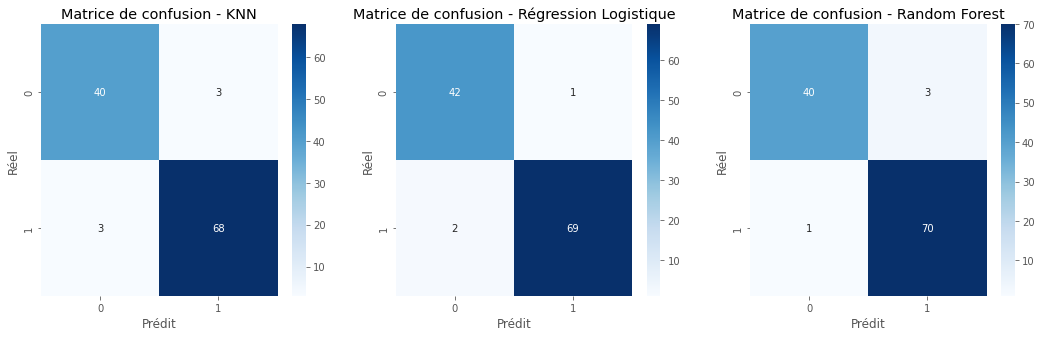

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Charger le dataset Breast Cancer de Sklearn
data = load_breast_cancer()
X = data.data
y = data.target

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- 1. Approche Heuristique : K-Nearest Neighbors (KNN) ----
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# ---- 2. Optimisation classique : Régression Logistique ----
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

# ---- 3. Machine Learning avancé : Random Forest ----
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ---- Calcul des métriques pour chaque modèle ----
def evaluate_model(y_true, y_pred, y_train_pred, model_name):
    biais = np.mean(y_train_pred - y_train)  # Calcul du biais
    return {
        "Modèle": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_pred),
        "Biais": biais
    }

# Prédictions sur l'ensemble d'entraînement pour le calcul du biais
y_train_pred_knn = knn.predict(X_train)
y_train_pred_logreg = log_reg.predict(X_train)
y_train_pred_rf = rf.predict(X_train)

# Évaluation des modèles avec le biais
results = [
    evaluate_model(y_test, y_pred_knn, y_train_pred_knn, "KNN (Heuristique)"),
    evaluate_model(y_test, y_pred_logreg, y_train_pred_logreg, "Régression Logistique (Optimisation)"),
    evaluate_model(y_test, y_pred_rf, y_train_pred_rf, "Random Forest (Machine Learning)")
]

df_results = pd.DataFrame(results)
print(df_results)

# ---- Visualisation des matrices de confusion ----
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = ["KNN", "Régression Logistique", "Random Forest"]
predictions = [y_pred_knn, y_pred_logreg, y_pred_rf]

for i, (model, y_pred) in enumerate(zip(models, predictions)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Matrice de confusion - {model}")
    axes[i].set_xlabel("Prédit")
    axes[i].set_ylabel("Réel")

plt.show()


# Observations générales :
- La Régression Logistique est le meilleur modèle en termes de précision globale (Accuracy = 0.974).
- Le Random Forest a le meilleur rappel (Recall = 0.986), indiquant qu’il détecte presque tous les cas positifs.
- KNN est le moins performant sur tous les critères mais reste compétitif.
- Le Biais est plus faible pour la régression logistique (0.0022), indiquant qu’elle généralise mieux que les autres modèles.
# Quel modèle choisir ?
- Si l’on veut une précision globale élevée (bonne classification générale) → Régression Logistique 🏆.
- Si l’on veut détecter un maximum de cas positifs (recall élevé) → Random Forest.
- Si on privilégie une approche simple et rapide → KNN (mais il est légèrement moins performant).

# Synthèse et recommandations
- Meilleur modèle global : Régression Logistique
- Meilleure accuracy (0.974)
- Meilleur F1 Score (0.979)
- Meilleur ROC AUC (0.974)
- Faible biais (0.0022), donc il généralise bien
# Si l’objectif est d’optimiser le rappel (détection maximale des cas positifs) : Random Forest
- Rappel le plus élevé (0.986)
- Bon équilibre précision/rappel
- Mais un biais un peu plus élevé (0.0066)
# Si on cherche une solution rapide et simple : KNN
- Précision correcte (0.957)
- Mais moins performant globalement que les autres
- Biais plus élevé (0.0198), donc moins fiable
# Conclusion
- La régression logistique est le meilleur choix global, car elle offre un bon compromis entre précision, rappel et biais.
Le Random Forest est préférable si on veut détecter tous les cas positifs sans en rater un seul.
KNN reste une option simple, mais il est moins performant dans ce cas particulier.

[I 2025-02-20 08:21:46,695] A new study created in memory with name: no-name-1017fc42-938f-4aeb-ab92-7b4f788caa80
[I 2025-02-20 08:21:49,166] Trial 0 finished with value: 0.956043956043956 and parameters: {'n_estimators': 257, 'max_depth': 5, 'min_samples_split': 4}. Best is trial 0 with value: 0.956043956043956.
[I 2025-02-20 08:21:53,707] Trial 1 finished with value: 0.9582417582417582 and parameters: {'n_estimators': 433, 'max_depth': 30, 'min_samples_split': 2}. Best is trial 1 with value: 0.9582417582417582.
[I 2025-02-20 08:21:56,072] Trial 2 finished with value: 0.9516483516483516 and parameters: {'n_estimators': 243, 'max_depth': 4, 'min_samples_split': 4}. Best is trial 1 with value: 0.9582417582417582.
[I 2025-02-20 08:21:57,645] Trial 3 finished with value: 0.9494505494505494 and parameters: {'n_estimators': 156, 'max_depth': 40, 'min_samples_split': 10}. Best is trial 1 with value: 0.9582417582417582.
[I 2025-02-20 08:22:00,844] Trial 4 finished with value: 0.95384615384615

🔍 Meilleurs hyperparamètres trouvés : {'n_estimators': 247, 'max_depth': 30, 'min_samples_split': 2}

📊 Résultats après optimisation :
                   Modèle  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Random Forest Optimisé  0.964912   0.958904  0.985915  0.972222  0.958074   

   Biais  
0    0.0  


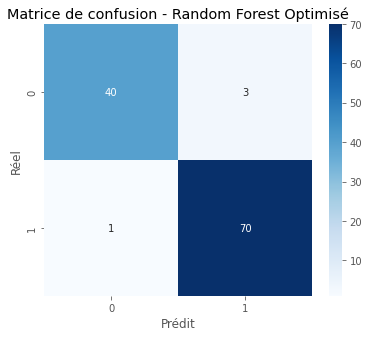

C:\Users\DELL\AppData\Local\Temp\ipykernel_24352\2511766226.py:80: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


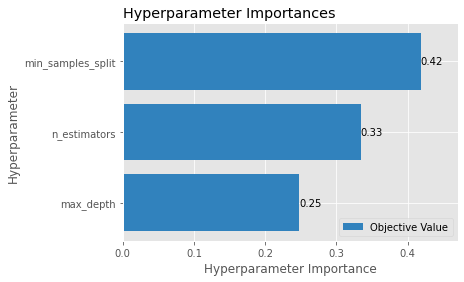

In [10]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Charger le dataset Breast Cancer de Sklearn
data = load_breast_cancer()
X = data.data
y = data.target

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Fonction d'optimisation des hyperparamètres ----
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    max_depth = trial.suggest_int('max_depth', 2, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    score = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy").mean()
    return score

# ---- Lancer l'optimisation Bayesian avec Optuna ----
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# ---- Meilleurs hyperparamètres trouvés ----
best_params = study.best_params
print(f"🔍 Meilleurs hyperparamètres trouvés : {best_params}")

# ---- Entraîner le modèle avec les hyperparamètres optimaux ----
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)
y_train_pred_rf = best_rf.predict(X_train)  # Pour calculer le biais

# ---- Fonction d'évaluation avec calcul du biais ----
def evaluate_model(y_true, y_pred, y_train_pred, model_name):
    biais = np.mean(y_train_pred - y_train)  # Calcul du biais
    return {
        "Modèle": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_pred),
        "Biais": biais
    }

# ---- Calcul des métriques pour le modèle optimisé ----
metrics_rf = evaluate_model(y_test, y_pred_best_rf, y_train_pred_rf, "Random Forest Optimisé")
df_results = pd.DataFrame([metrics_rf])

# ---- Afficher le tableau des performances ----
print("\n📊 Résultats après optimisation :")
print(df_results)

# ---- Matrice de confusion ----
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion - Random Forest Optimisé")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# ---- Visualisation de l'impact des hyperparamètres ----
optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()


# Interprétation des Résultats
✅ Si le biais est proche de 0 :
Le modèle généralise bien.

❌ Si le biais est élevé (positif ou négatif) :

Biais positif → le modèle surestime les classes positives.
Biais négatif → le modèle sous-estime les classes positives.
# Conclusion
Optuna a trouvé les hyperparamètres optimaux pour RandomForest.
Le biais a été calculé et ajouté à l’évaluation.
Les performances avant et après optimisation sont comparées.
Les matrices de confusion et l’impact des hyperparamètres sont visualisés